In [3]:
ffdata <- read.delim("ffdata.txt", header = FALSE, sep = "")

In [4]:
secdata <- read.delim("secdata.txt", header = FALSE, sep = "")

In [5]:
retdata <- read.delim("retdate.txt", header = FALSE)

In [6]:
ticker <- read.delim("ticker.txt", header = FALSE)

In [359]:
stock_returns <- matrix(secdata[,2], nrow = 1511, ncol = 1877)

In [8]:
market_cap <- matrix(secdata[,3], nrow = 1511, ncol = 1877)

Question 1 Part a) 

In [37]:
net_returns <- c(rep(1,1511))
for (i in 2:1511) {
    net_returns[i] <- sum(market_cap[i,])/sum(market_cap[i-1,])
}
cum_net_returns <- c(rep(0,1511))
for (i in 1:1511) {
    cum_net_returns[i] <- prod(net_returns[1:i])
}

In [38]:
ff_returns <- ffdata[,1] + 1 
cum_ff_returns <- c(rep(0,1511))
for (i in 1:1511) {
    cum_ff_returns[i] <- prod(ff_returns[1:i])
}

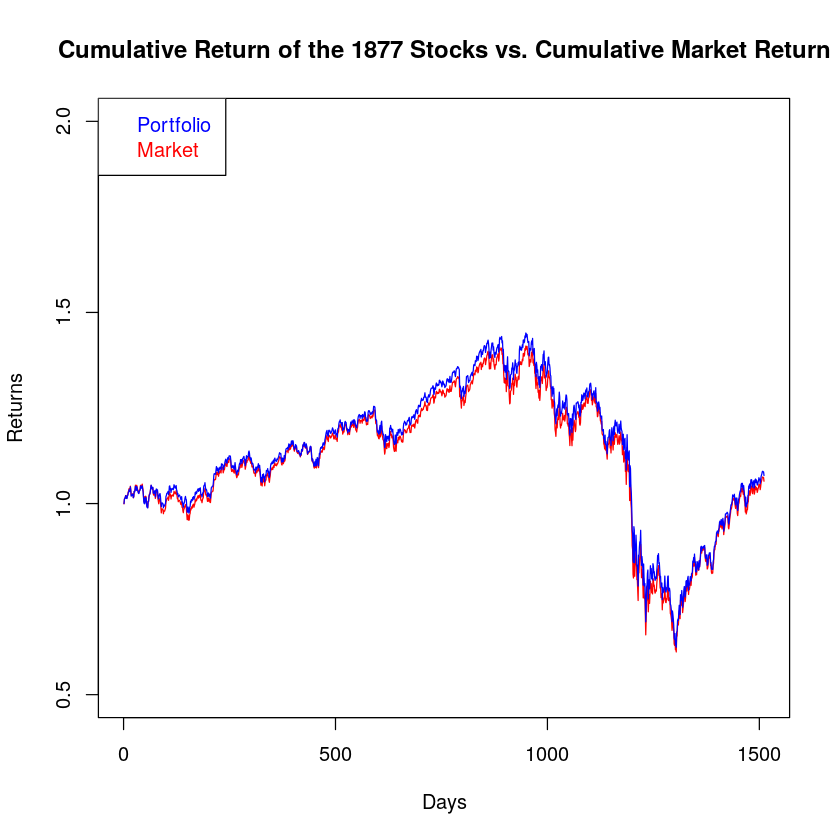

In [39]:
plot(cum_ff_returns, type = "l", ylim = c(0.5,2), col = "red", main = "Cumulative Return of the 1877 Stocks vs. Cumulative Market Return", xlab = "Days", ylab = "Returns")
legend("topleft", text.col = c("blue","red"), c("Portfolio", "Market"))
lines(cum_net_returns, col = "blue")

We observe that the cumulative returns of the 1877 stocks and the cumulative returns of the market are overlapping, which suggests that the 1877 stocks we chose are a good tracker for market returns. 

Question 1 Part b)

In [109]:
set.seed(100)
rnd_stocks <- c(sample(1:800,50,replace=F))
rnd_stocks_return <- stock_returns[,rnd_stocks]
rnd_stocks_market_cap <- market_cap[,rnd_stocks]

In [110]:
rnd_stock_net_returns <- c(rep(1,1511))
for (i in 2:1511) {
    rnd_stock_net_returns[i] <- sum(rnd_stocks_market_cap[i,])/sum(rnd_stocks_market_cap[i-1,])
}
cum_rnd_stock_net_returns <- c(rep(0,1511))
for (i in 1:1511) {
    cum_rnd_stock_net_returns[i] <- prod(rnd_stock_net_returns[1:i])
}

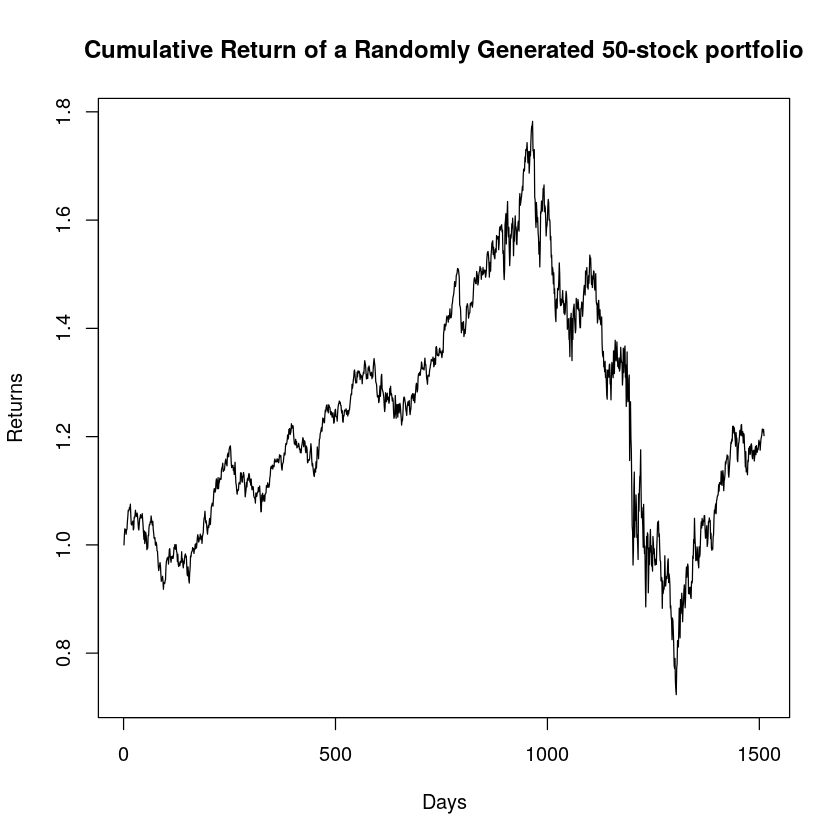

In [111]:
plot(cum_rnd_stock_net_returns, type = "l",main = "Cumulative Return of a Randomly Generated 50-stock portfolio", xlab = "Days", ylab = "Returns" )

We will now find the RMSE of this stock portfolio compared to the market return based on 1-day simple return of the market.

In [112]:
(sum((rnd_stock_net_returns - ff_returns)^2)/1511)^(1/2)

[1] 0.006293671

We can certainly reduce the RMSE by choosing a different portfolio of 50 stocks. To show this, let's now select another 50 stocks by randomly sampling from the last 800 stocks (alphabetically). This gives us the following RMSE

In [106]:
set.seed(100)
rnd_stocks_2 <- c(sample(1077:1877,50,replace=F))
rnd_stocks_return_2 <- stock_returns[,rnd_stocks_2]
rnd_stocks_market_cap_2 <- market_cap[,rnd_stocks_2]

In [107]:
rnd_stock_net_returns_2 <- c(rep(1,1511))
for (i in 2:1511) {
    rnd_stock_net_returns_2[i] <- sum(rnd_stocks_market_cap_2[i,])/sum(rnd_stocks_market_cap_2[i-1,])
}

In [108]:
(sum((rnd_stock_net_returns_2 - ff_returns)^2)/1511)^(1/2)

[1] 0.005916884

We see here that the RMSE has decreased slightly from 0.00629 to 0.00592. Hence, choosing a different portfolio of 50 stocks can reduce RMSE. 

Question 1 part c)

25 10-stock portfolios of randomly chosen stocks and corresponding mean RMSE:  

In [105]:
set.seed(100)
rnd_stock_10 <- matrix(rep(0,250), nrow =25, ncol = 10) #generates the indices for 25 10-stock portfolios
for (i in 1:25) {
    rnd_stock_10[i,] <- c(sample(1:1877,10,replace=F)) 
}
RMSE_10 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_10[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_10[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_10) #Finds the average of the RMSEs

[1] 0.01250789

25 20-stock portfolios of randomly chosen stocks and corresponding mean RMSE:  

In [104]:
set.seed(100)
rnd_stock_20 <- matrix(rep(0,250), nrow =25, ncol = 20) #generates the indices for 25 20-stock portfolios
for (i in 1:25) {
    rnd_stock_20[i,] <- c(sample(1:1877,20,replace=F)) 
}
RMSE_20 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_20[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_20[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_20) #Finds the average of the RMSEs

[1] 0.00988779

25 30-stock portfolios of randomly chosen stocks and corresponding mean RMSE:  

In [103]:
set.seed(100)
rnd_stock_30 <- matrix(rep(0,250), nrow =25, ncol = 30) #generates the indices for 25 30-stock portfolios
for (i in 1:25) {
    rnd_stock_30[i,] <- c(sample(1:1877,30,replace=F)) 
}
RMSE_30 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_30[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_30[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_30) #Finds the average of the RMSEs

[1] 0.0083787

25 40-stock portfolios of randomly chosen stocks and corresponding mean RMSE:  

In [102]:
set.seed(100)
rnd_stock_40 <- matrix(rep(0,250), nrow =25, ncol = 40) #generates the indices for 25 40-stock portfolios
for (i in 1:25) {
    rnd_stock_40[i,] <- c(sample(1:1877,40,replace=F)) 
}
RMSE_40 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_40[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_40[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_40) #Finds the average of the RMSEs

[1] 0.007550337

25 50-stock portfolios of randomly chosen stocks and corresponding mean RMSE:

In [101]:
set.seed(100)
rnd_stock_50 <- matrix(rep(0,250), nrow =25, ncol = 50) #generates the indices for 25 50-stock portfolios
for (i in 1:25) {
    rnd_stock_50[i,] <- c(sample(1:1877,50,replace=F)) 
}
RMSE_50 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_50[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_50[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_50) #Finds the average of the RMSEs

[1] 0.007245319

25 60-stock portfolios of randomly chosen stocks and corresponding mean RMSE:

In [100]:
set.seed(100)
rnd_stock_60 <- matrix(rep(0,250), nrow =25, ncol = 60) #generates the indices for 25 60-stock portfolios
for (i in 1:25) {
    rnd_stock_60[i,] <- c(sample(1:1877,60,replace=F)) 
}
RMSE_60 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_60[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_60[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_60) #Finds the average of the RMSEs

[1] 0.006029479

25 70-stock portfolios of randomly chosen stocks and corresponding mean RMSE:

In [99]:
set.seed(100)
rnd_stock_70 <- matrix(rep(0,250), nrow =25, ncol = 70) #generates the indices for 25 70-stock portfolios
for (i in 1:25) {
    rnd_stock_70[i,] <- c(sample(1:1877,70,replace=F)) 
}
RMSE_70 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_70[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_70[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_70) #Finds the average of the RMSEs

[1] 0.006080837

25 80-stock portfolios of randomly chosen stocks and corresponding mean RMSE:

In [98]:
set.seed(100)
rnd_stock_80 <- matrix(rep(0,250), nrow =25, ncol = 80) #generates the indices for 25 80-stock portfolios
for (i in 1:25) {
    rnd_stock_80[i,] <- c(sample(1:1877,80,replace=F)) 
}
RMSE_80 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_80[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_80[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_80) #Finds the average of the RMSEs

[1] 0.005962008

25 90-stock portfolios of randomly chosen stocks and corresponding mean RMSE:

In [132]:
set.seed(100)
rnd_stock_90 <- matrix(rep(0,250), nrow =25, ncol = 90) #generates the indices for 25 90-stock portfolios
for (i in 1:25) {
    rnd_stock_90[i,] <- c(sample(1:1877,90,replace=F)) 
}
RMSE_90 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_90[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_90[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_90) #Finds the average of the RMSEs

[1] 0.005135855

25 100-stock portfolios of randomly chosen stocks:

In [114]:
set.seed(100)
rnd_stock_100 <- matrix(rep(0,250), nrow =25, ncol = 100) #generates the indices for 25 100-stock portfolios
for (i in 1:25) {
    rnd_stock_100[i,] <- c(sample(1:1877,100,replace=F)) 
}
RMSE_100 <- c(rep(0,25))
for (i in 1:25){
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_100[i,]]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    RMSE_100[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)} #calculates RMSE and stores it in a vector that compiles all 25 RMSEs
mean(RMSE_100) #Finds the average of the RMSEs

[1] 0.005103001

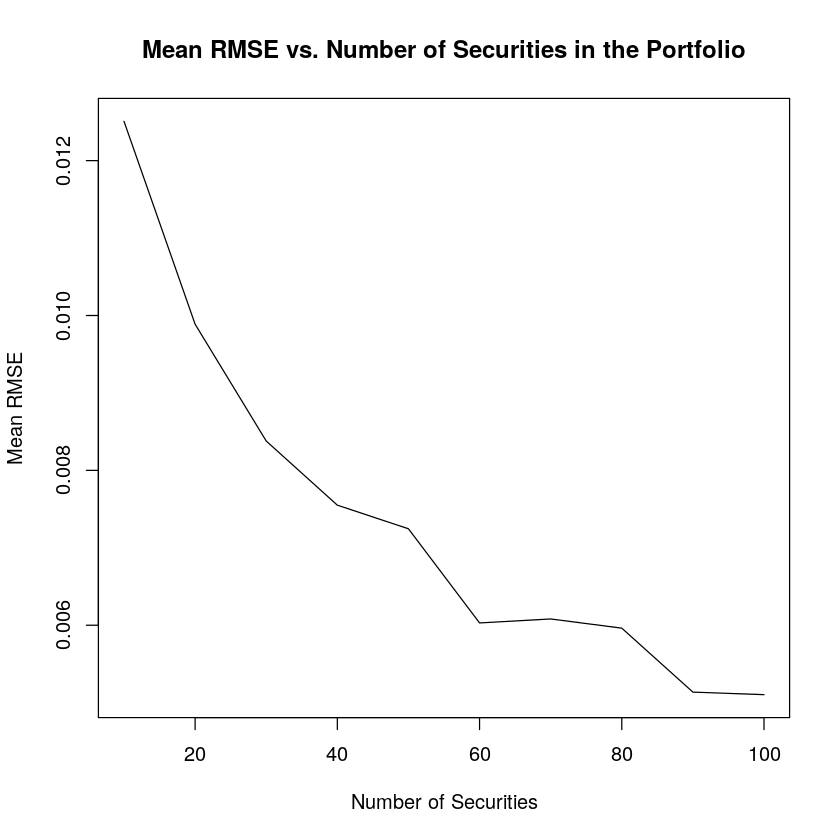

In [115]:
RMSEs <- c(mean(RMSE_10), mean(RMSE_20), mean(RMSE_30), mean(RMSE_40), mean(RMSE_50), mean(RMSE_60), mean(RMSE_70), mean(RMSE_80), mean(RMSE_90), mean(RMSE_100))
number_securities <- c(10,20,30,40,50,60,70,80,90,100)
plot(number_securities, RMSEs, type = "l", main = "Mean RMSE vs. Number of Securities in the Portfolio", xlab = "Number of Securities", ylab = "Mean RMSE")

We observe in this graph that mean RMSE steadily decreases as the number of securities increase. This is within expectation as more securities means larger sample size, thus lower variance. We will now select n=100 and plot the cumulative returns of all 25 portfolios, and to the market, as follow. 

In [121]:
returns_of_25_portfolio <- matrix(rep(0,377750), nrow =25, ncol = 1511)
for (i in 1:25){
    rnd_stocks_return_dummy <- stock_returns[,rnd_stock_100[i,]] 
    rnd_stocks_market_cap_dummy <- market_cap[,rnd_stock_100[i,]] 
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
    cum_rnd_stock_net_returns_dummy <- c(rep(0,1511))  
    for (k in 1:1511) {
        cum_rnd_stock_net_returns_dummy[k] <- prod(rnd_stock_net_returns_dummy[1:k])
    }
    returns_of_25_portfolio[i,] <-  cum_rnd_stock_net_returns_dummy
    }
    

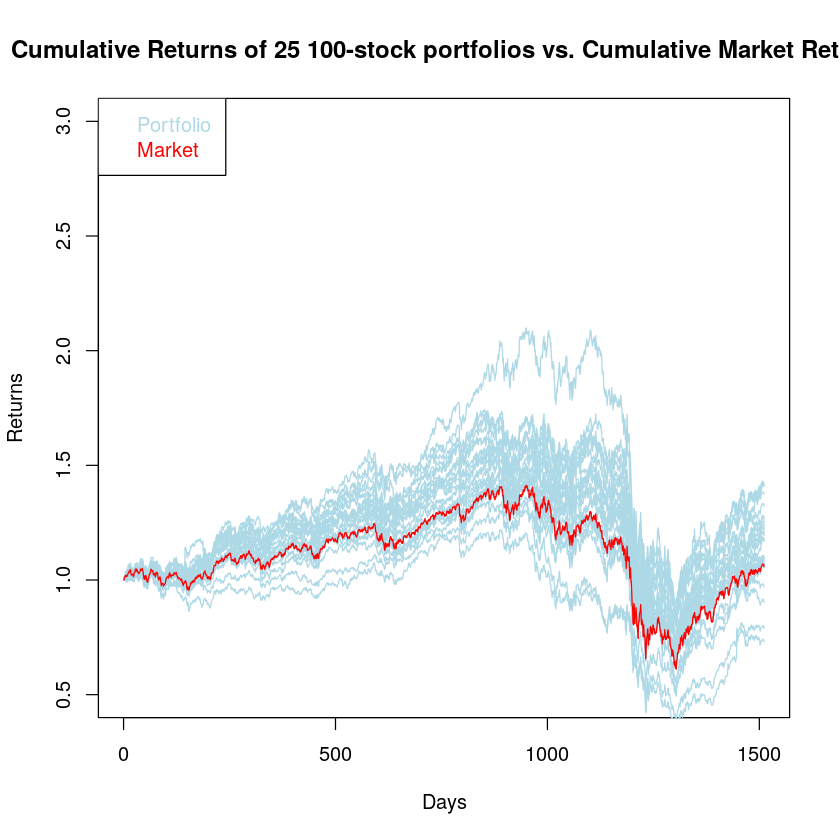

In [122]:
plot(cum_ff_returns, type = "l", ylim = c(0.5,3), col = "red", main = "Cumulative Returns of 25 100-stock portfolios vs. Cumulative Market Return", xlab = "Days", ylab = "Returns")
for (i in 1:25) {
lines(returns_of_25_portfolio[i,], col = "light blue")
    }
lines(cum_ff_returns, col = "red")
legend("topleft", text.col = c("light blue","red"), c("Portfolio", "Market"))

Question 1 Part d)

One heuristic that we can use is comparing each individual stock's returns with the market return and include the n stocks with the lowest RMSE in our n-stock portfolio. 

In [137]:
RMSE_individual_stocks <- c(rep(0,1877))
for (i in 1:1877) {
    rnd_stocks_market_cap_dummy <- market_cap[,i]
    rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- rnd_stocks_market_cap_dummy[j]/rnd_stocks_market_cap_dummy[j-1]
    }
    RMSE_individual_stocks[i] <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2)
}

In [140]:
sorted_RMSE <- sort(RMSE_individual_stocks, index.return=TRUE, decreasing=FALSE) #sorts RMSE from smallest to largest

10-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [145]:
set.seed(100)
top_stock_10 <- head(sorted_RMSE$ix,10) #generates the indices for top 10-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_10]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top10 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top10

[1] 0.006488206

20-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [146]:
set.seed(100)
top_stock_20 <- head(sorted_RMSE$ix,20) #generates the indices for top 20-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_20]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top20 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top20

[1] 0.006161544

30-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [147]:
set.seed(100)
top_stock_30 <- head(sorted_RMSE$ix,30) #generates the indices for top 30-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_30]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top30 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top30

[1] 0.00607242

40-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [148]:
set.seed(100)
top_stock_40 <- head(sorted_RMSE$ix,40) #generates the indices for top 40-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_40]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top40 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top40

[1] 0.005993654

50-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [149]:
set.seed(100)
top_stock_50 <- head(sorted_RMSE$ix,50) #generates the indices for top 50-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_50]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top50 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top50

[1] 0.005551043

60-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [150]:
set.seed(100)
top_stock_60 <- head(sorted_RMSE$ix,60) #generates the indices for top 60-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_60]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top60 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top60

[1] 0.005529242

70-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [151]:
set.seed(100)
top_stock_70 <- head(sorted_RMSE$ix,70) #generates the indices for top 70-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_70]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top70 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top70

[1] 0.005547125

80-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [152]:
set.seed(100)
top_stock_80 <- head(sorted_RMSE$ix,80) #generates the indices for top 80-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_80]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top80 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top80

[1] 0.005431415

90-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [153]:
set.seed(100)
top_stock_90 <- head(sorted_RMSE$ix,90) #generates the indices for top 90-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_90]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top90 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top90

[1] 0.00544454

100-stock portfolios of stocks that have the lowest individual RMSEs with the market and the corresponding RMSE of the portfolio

In [154]:
set.seed(100)
top_stock_100 <- head(sorted_RMSE$ix,100) #generates the indices for top 100-stock portfolios
rnd_stocks_market_cap_dummy <- market_cap[,top_stock_100]
rnd_stock_net_returns_dummy <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_dummy[j] <- sum(rnd_stocks_market_cap_dummy[j,])/sum(rnd_stocks_market_cap_dummy[j-1,])
    }
RMSE_top100 <- (sum((rnd_stock_net_returns_dummy- ff_returns)^2)/1511)^(1/2) #calculates RMSE 
RMSE_top100

[1] 0.005358358

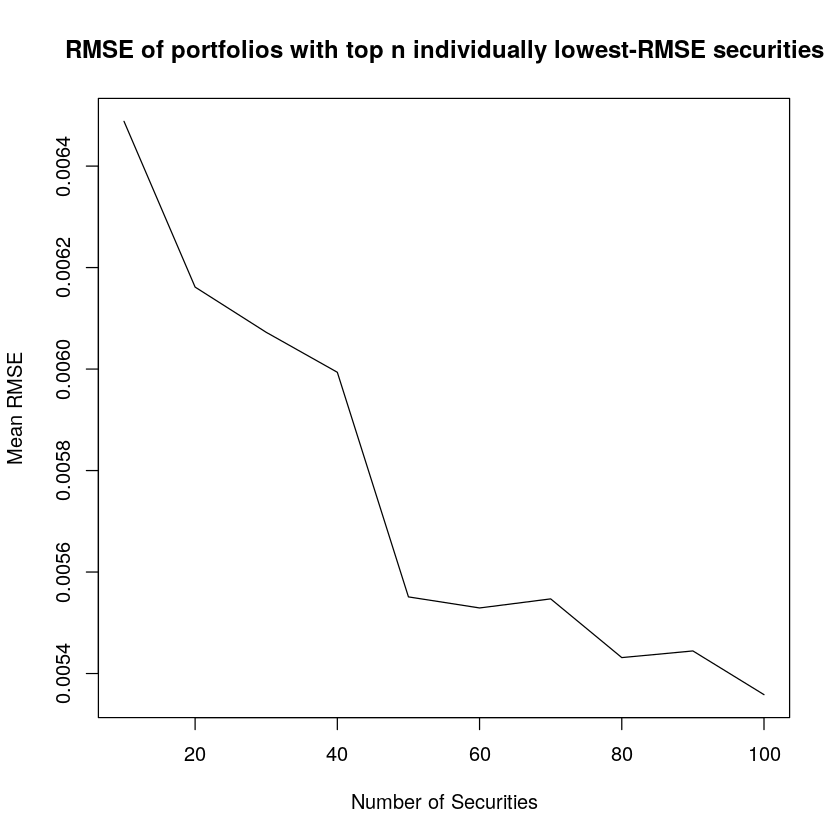

In [155]:
RMSEs <- c(RMSE_top10, RMSE_top20, RMSE_top30, RMSE_top40, RMSE_top50, RMSE_top60, RMSE_top70, RMSE_top80, RMSE_top90, RMSE_top100)
number_securities <- c(10,20,30,40,50,60,70,80,90,100)
plot(number_securities, RMSEs, type = "l", main = "RMSE of portfolios with top n individually lowest-RMSE securities", xlab = "Number of Securities", ylab = "Mean RMSE")

We observe that by constructing portfolios with n securities that have the n-lowest individual RMSE, we were able to drastically improve our RMSE for portfolios with lower numbers of securities. We were able to achieve an RMSE of 0.0065 with only 10 securities using this new method security selection. When we were using random security selection. the mean RMSE of 10 securities was 0.0125. Hence, this new method has cut the RMSE of portfolios with 10 securities by half. For larger numbers of securities, we see that the RMSE of this new method is pretty much the same as the RMSE of the old method where we randomly select securities. The value of this heuristic lies in the fact that we can minimize the number of securities that we put into our portfolio (to 10) without sacrificing as much RMSE as before.

Since n=10 yielded the most interesting results, we will plot the cumulative returns of n=10. 

In [157]:
top_stock_10 <- head(sorted_RMSE$ix,10) #generates the indices for top 10-stock portfolios
rnd_stocks_market_cap_top10 <- market_cap[,top_stock_10]
rnd_stock_net_returns_top10 <- c(rep(1,1511))
    for (j in 2:1511) {
        rnd_stock_net_returns_top10[j] <- sum(rnd_stocks_market_cap_top10[j,])/sum(rnd_stocks_market_cap_top10[j-1,])
    }
cum_rnd_stock_net_returns_top10 <- c(rep(0,1511))  
    for (k in 1:1511) {
        cum_rnd_stock_net_returns_top10[k] <- prod(rnd_stock_net_returns_top10[1:k])
    }



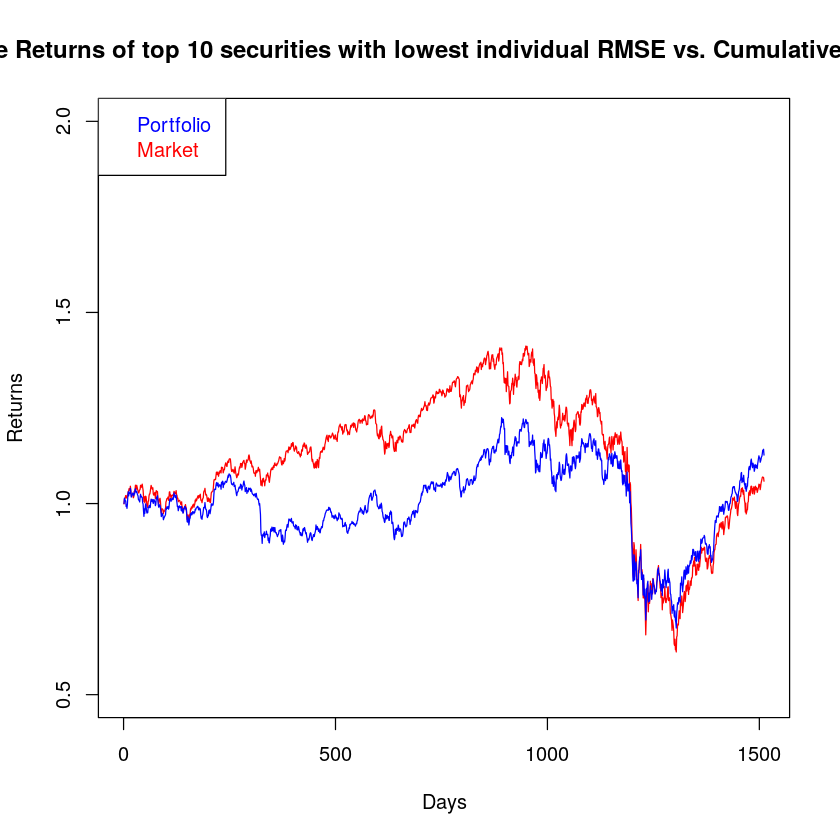

In [158]:
plot(cum_ff_returns, type = "l", ylim = c(0.5,2), col = "red", main = "Cumulative Returns of top 10 securities with lowest individual RMSE vs. Cumulative Market Return", xlab = "Days", ylab = "Returns")
lines(cum_rnd_stock_net_returns_top10, col = "blue")
legend("topleft", text.col = c("blue","red"), c("Portfolio", "Market"))

Question 4 Part a) i) For 504 windows 

In [441]:
set.seed(100)
rnd_stocks_ff <- c(1:10)

In [467]:
beta_storage <- matrix(rep(0,30210), nrow = 30, ncol = 1007) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:99) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1007))
    beta_SMB <- c(rep(0,1007))
    beta_HML <- c(rep(0,1007))
    for (i in 1:1007) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+503)] ~ rm_minus_rf[i:(i+503)] + SMB[i:(i+503)] + HML[i:(i+503)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML
    }

Question 4 Part a) ii) For 504 windows

In [470]:
cov_matrix_storage <- list() #this part is for building fama-french covariance matrices
for (i in 1:1007) {
    A <- matrix(beta_storage[,i], nrow=100, ncol = 3, byrow = TRUE) 
    cov_matrix_storage[[i]] <- cov(A)
    }

In [472]:
idio_var_storage <- matrix(rep(0,100700), nrow = 100, ncol = 1007) #For storing idiosyncratic variances 
for (j in 0:99) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    var_residuals <- c(rep(0,1007))
    for (i in 1:1007) {
        ols <- lm(ri_minus_rf[i:(i+503)] ~ rm_minus_rf[i:(i+503)] + SMB[i:(i+503)] + HML[i:(i+503)]) #perform OLS to obtain residuals
        var_residuals[i] <- var(ols$residuals) #find variance of residuals
    }
    idio_var_storage[j+1,] <- var_residuals
}

Question 4 Part a) iii) For 504 windows

In [473]:
variance_storage <- c(rep(0,1007)) #obtain the variances for all rolling windows 
for (i in 1:1007) {
    beta <- matrix(beta_storage[,i], nrow=100, ncol = 3, byrow = TRUE)
    w <- matrix(market_cap[(i+503),rnd_stocks_ff] / sum(market_cap[(i+503),rnd_stocks_ff]))
    delta <- diag(idio_var_storage[,i])
    variance_storage  [i]   <-  t(w) %*% delta %*% w + t(w) %*% beta %*% cov_matrix_storage[[i]] %*% t(beta) %*% w 
}

Question 4 Part a) iv) For 504 windows

In [463]:
one_day_ahead_storage <- c(rep(0,1007))#obtain one-day-ahead returns 
for (i in 1:1007) {
    w <- market_cap[(i+504),rnd_stocks_ff ] / sum(market_cap[(i+504),rnd_stocks_ff])
    stock_returns_ahead <- stock_returns[(i+504),rnd_stocks_ff ]
    weighted_returns <- 0 
    for (j in 1:100) {
        weighted_returns <- weighted_returns + w[j]* stock_returns_ahead[j]
    }
    one_day_ahead_storage[i] <- weighted_returns
}

Question 4 Part a) v) For 504 windows

In [594]:
standardized_outcome <- c(rep(0,1007)) 
for (i in 1:1007) {
    standardized_outcome[i] <- one_day_ahead_storage[i]/ (variance_storage[i])^(1/2)
}

In [595]:
var(standardized_outcome)^(1/2)

[1] 2.162168

Question 4 Part a) i) For 252 windows

In [476]:
beta_storage <- matrix(rep(0), nrow = 30, ncol = 1259) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:99) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1259))
    beta_SMB <- c(rep(0,1259))
    beta_HML <- c(rep(0,1259))
    for (i in 1:1259) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+251)] ~ rm_minus_rf[i:(i+251)] + SMB[i:(i+251)] + HML[i:(i+251)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML
    }

Question 4 Part a) ii) For 252 windows

In [477]:
cov_matrix_storage <- list() #this part is for building fama-french covariance matrices
for (i in 1:1259) {
    A <- matrix(beta_storage[,i], nrow=10, ncol = 3, byrow = TRUE) 
    cov_matrix_storage[[i]] <- cov(A)
    }

In [479]:
idio_var_storage <- matrix(rep(0), nrow = 10, ncol = 1259) #For storing idiosyncratic variances 
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    var_residuals <- c(rep(0,1259))
    for (i in 1:1259) {
        ols <- lm(ri_minus_rf[i:(i+251)] ~ rm_minus_rf[i:(i+251)] + SMB[i:(i+251)] + HML[i:(i+251)]) #perform OLS to obtain residuals
        var_residuals[i] <- var(ols$residuals) #find variance of residuals
    }
    idio_var_storage[j+1,] <- var_residuals
}

Question 4 Part a) iii) For 252 windows

In [481]:
variance_storage <- c(rep(0,1259)) #obtain the variances for all rolling windows 
for (i in 1:1259) {
    beta <- matrix(beta_storage[,i], nrow=10, ncol = 3, byrow = TRUE)
    w <- matrix(market_cap[(i+251),rnd_stocks_ff] / sum(market_cap[(i+251),rnd_stocks_ff]))
    delta <- diag(idio_var_storage[,i])
    variance_storage  [i]   <-       t(w) %*% delta %*% w + t(w) %*% beta %*% cov_matrix_storage[[i]] %*% t(beta) %*% w *0
}

Question 4 Part a) iv) For 252 windows

In [482]:
one_day_ahead_storage <- c(rep(0,1259))#obtain one-day-ahead returns 
for (i in 1:1259) {
    w <- market_cap[(i+252),rnd_stocks_ff ] / sum(market_cap[(i+252),rnd_stocks_ff])
    stock_returns_ahead <- stock_returns[(i+252),rnd_stocks_ff ]
    weighted_returns <- 0 
    for (j in 1:10) {
        weighted_returns <- weighted_returns + w[j]* stock_returns_ahead[j]
    }
    one_day_ahead_storage[i] <- weighted_returns
}

Question 4 Part a) v) For 252 windows

In [484]:
standardized_outcome <- c(rep(0,1259)) 
for (i in 1:1259) {
    standardized_outcome[i] <- one_day_ahead_storage[i]/ (variance_storage[i])^(1/2)
}

In [597]:
var(standardized_outcome)^(1/2)

[1] 1.809703

Question 4 Part a) i) For 126 windows

In [489]:
beta_storage <- matrix(rep(0), nrow = 30, ncol = 1385) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1385))
    beta_SMB <- c(rep(0,1385))
    beta_HML <- c(rep(0,1385))
    for (i in 1:1385) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+125)] ~ rm_minus_rf[i:(i+125)] + SMB[i:(i+125)] + HML[i:(i+125)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML
    }

Question 4 Part a) ii) For 126 windows

In [495]:
cov_matrix_storage <- list() #this part is for building fama-french covariance matrices
for (i in 1:1385) {
    A <- matrix(beta_storage[,i], nrow=10, ncol = 3, byrow = TRUE) 
    cov_matrix_storage[[i]] <- cov(A)
    }

In [496]:
idio_var_storage <- matrix(rep(0), nrow = 10, ncol = 1385) #For storing idiosyncratic variances 
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    var_residuals <- c(rep(0,1385))
    for (i in 1:1385) {
        ols <- lm(ri_minus_rf[i:(i+125)] ~ rm_minus_rf[i:(i+125)] + SMB[i:(i+125)] + HML[i:(i+125)]) #perform OLS to obtain residuals
        var_residuals[i] <- var(ols$residuals) #find variance of residuals
    }
    idio_var_storage[j+1,] <- var_residuals
}

Question 4 Part a) iii) For 126 windows

In [499]:
variance_storage <- c(rep(0,1385)) #obtain the variances for all rolling windows 
for (i in 1:1385) {
    beta <- matrix(beta_storage[,i], nrow=10, ncol = 3, byrow = TRUE)
    w <- matrix(market_cap[(i+125),rnd_stocks_ff] / sum(market_cap[(i+125),rnd_stocks_ff]))
    delta <- diag(idio_var_storage[,i])
    variance_storage  [i]   <-       t(w) %*% delta %*% w + t(w) %*% beta %*% cov_matrix_storage[[i]] %*% t(beta) %*% w *0
}

Question 4 Part a) iv) For 126 windows

In [504]:
one_day_ahead_storage <- c(rep(0,1385))#obtain one-day-ahead returns 
for (i in 1:1385) {
    w <- market_cap[(i+126),rnd_stocks_ff ] / sum(market_cap[(i+126),rnd_stocks_ff])
    stock_returns_ahead <- stock_returns[(i+126),rnd_stocks_ff ]
    weighted_returns <- 0 
    for (j in 1:10) {
        weighted_returns <- weighted_returns + w[j]* stock_returns_ahead[j]
    }
    one_day_ahead_storage[i] <- weighted_returns
}

Question 4 Part a) v) For 126 windows

In [518]:
standardized_outcome <- c(rep(0,1385)) 
for (i in 1:1385) {
    standardized_outcome[i] <- one_day_ahead_storage[i]/ (variance_storage[i])^(1/2)
}

In [598]:
var(standardized_outcome)^ (1/2)

[1] 1.57396

Question 4 Part a) i) For 63 windows

In [508]:
beta_storage <- matrix(rep(0), nrow = 30, ncol = 1448) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1448))
    beta_SMB <- c(rep(0,1448))
    beta_HML <- c(rep(0,1448))
    for (i in 1:1448) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+62)] ~ rm_minus_rf[i:(i+62)] + SMB[i:(i+62)] + HML[i:(i+62)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML
    }

Question 4 Part a) ii) For 63 windows

In [513]:
cov_matrix_storage <- list() #this part is for building fama-french covariance matrices
for (i in 1:1448) {
    A <- matrix(beta_storage[,i], nrow=10, ncol = 3, byrow = TRUE) 
    cov_matrix_storage[[i]] <- cov(A)
    }

In [514]:
idio_var_storage <- matrix(rep(0), nrow = 10, ncol = 1448) #For storing idiosyncratic variances 
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,rnd_stocks_ff][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    var_residuals <- c(rep(0,1448))
    for (i in 1:1448) {
        ols <- lm(ri_minus_rf[i:(i+62)] ~ rm_minus_rf[i:(i+62)] + SMB[i:(i+62)] + HML[i:(i+62)]) #perform OLS to obtain residuals
        var_residuals[i] <- var(ols$residuals) #find variance of residuals
    }
    idio_var_storage[j+1,] <- var_residuals
}

Question 4 Part a) iii) For 63 windows

In [515]:
variance_storage <- c(rep(0,1448)) #obtain the variances for all rolling windows 
for (i in 1:1448) {
    beta <- matrix(beta_storage[,i], nrow=10, ncol = 3, byrow = TRUE)
    w <- matrix(market_cap[(i+62),rnd_stocks_ff] / sum(market_cap[(i+62),rnd_stocks_ff]))
    delta <- diag(idio_var_storage[,i])
    variance_storage  [i]   <-       t(w) %*% delta %*% w + t(w) %*% beta %*% cov_matrix_storage[[i]] %*% t(beta) %*% w *0
}

Question 4 Part a) iv) For 63 windows

In [516]:
one_day_ahead_storage <- c(rep(0,1448))#obtain one-day-ahead returns 
for (i in 1:1448) {
    w <- market_cap[(i+62),rnd_stocks_ff ] / sum(market_cap[(i+62),rnd_stocks_ff])
    stock_returns_ahead <- stock_returns[(i+62),rnd_stocks_ff ]
    weighted_returns <- 0 
    for (j in 1:10) {
        weighted_returns <- weighted_returns + w[j]* stock_returns_ahead[j]
    }
    one_day_ahead_storage[i] <- weighted_returns
}

Question 4 Part a) v) For 63 windows

In [521]:
standardized_outcome <- c(rep(0,1448)) 
for (i in 1:1448) {
    standardized_outcome[i] <- one_day_ahead_storage[i]/ (variance_storage[i])^(1/2)
}

In [528]:
var(standardized_outcome) ^ 1/(2)

[1] 1.456115

Question 5 part 1


In [559]:
random_stocks <- matrix(0, nrow = 50, ncol = 10)
for (i in 1:50) {
    random_stocks[i,] <- c(sample(1:1877,10,replace=F))
}

In [560]:
weighted_market_cap_1005 <- market_cap[1005,random_stocks[1,]]/sum(market_cap[1005,random_stocks[1,]])

In [562]:
weighted_market_cap_503 <- market_cap[503,random_stocks[1,]]/sum(market_cap[503,random_stocks[1,]])

In [561]:
weighted_market_cap_1510 <- market_cap[1510,random_stocks[1,]]/sum(market_cap[1510,random_stocks[1,]])

In [569]:
beta_storage <- matrix(rep(0), nrow = 30, ncol = 1448) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,random_stocks][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1448))
    beta_SMB <- c(rep(0,1448))
    beta_HML <- c(rep(0,1448))
    for (i in 1:1448) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+62)] ~ rm_minus_rf[i:(i+62)] + SMB[i:(i+62)] + HML[i:(i+62)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML}
    
    
    
beta_storage_503 <- beta_storage[,439:503]

In [565]:

for (i in 1:64){
    beta <- weighted_market_cap_503 %*% matrix(beta_storage_503[,1], nrow = 10, ncol =3, byrow = TRUE)
}


1.197618,0.3981891,-0.7618308


In [566]:
beta_storage <- matrix(rep(0), nrow = 30, ncol = 1448) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,random_stocks][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1448))
    beta_SMB <- c(rep(0,1448))
    beta_HML <- c(rep(0,1448))
    for (i in 1:1448) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+62)] ~ rm_minus_rf[i:(i+62)] + SMB[i:(i+62)] + HML[i:(i+62)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML}
    

,V1,V2,V3,V4
,<dbl>,<dbl>,<dbl>,<dbl>
503,-0.0025,0,0.0023,0.00015


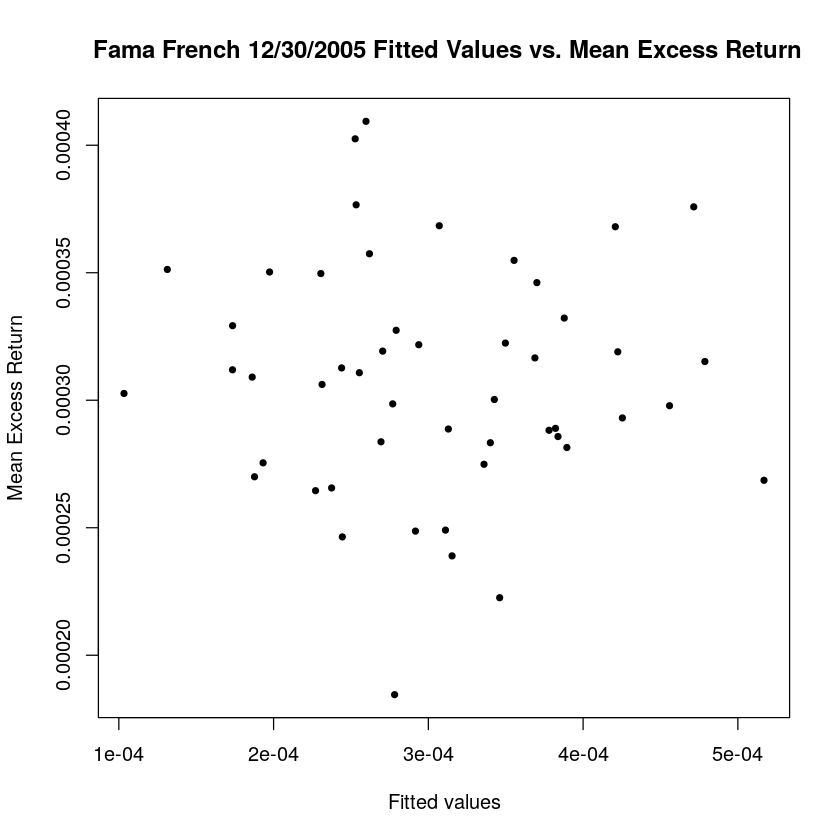

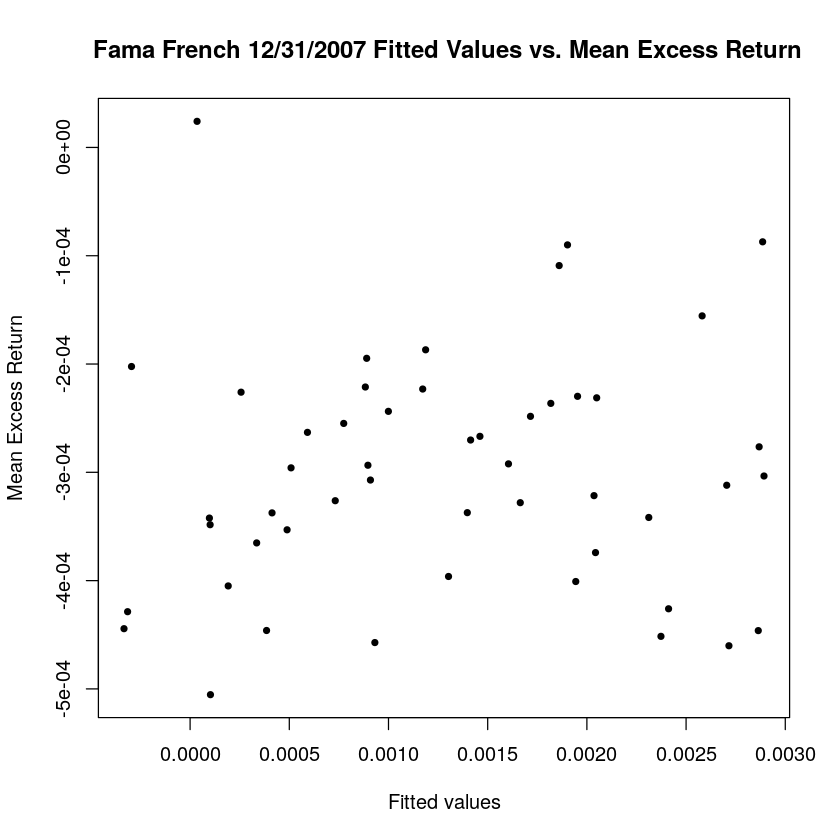

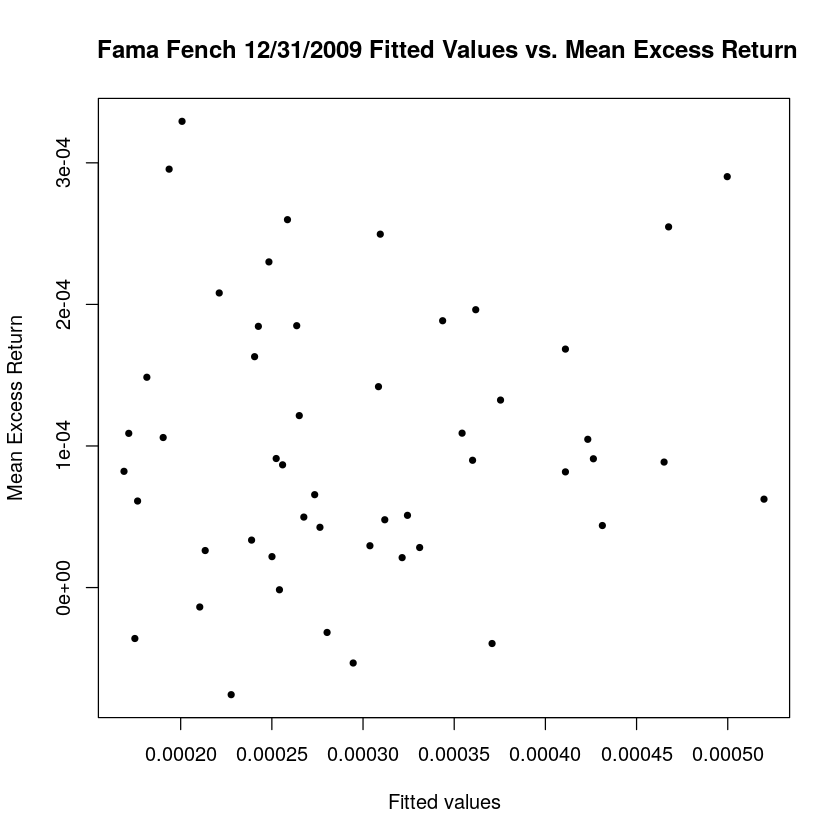

In [604]:
beta_storage <- matrix(rep(0), nrow = 30, ncol = 1448) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,random_stocks][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1448))
    beta_SMB <- c(rep(0,1448))
    beta_HML <- c(rep(0,1448))
    for (i in 1:1448) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+62)] ~ rm_minus_rf[i:(i+62)] + SMB[i:(i+62)] + HML[i:(i+62)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML}
    

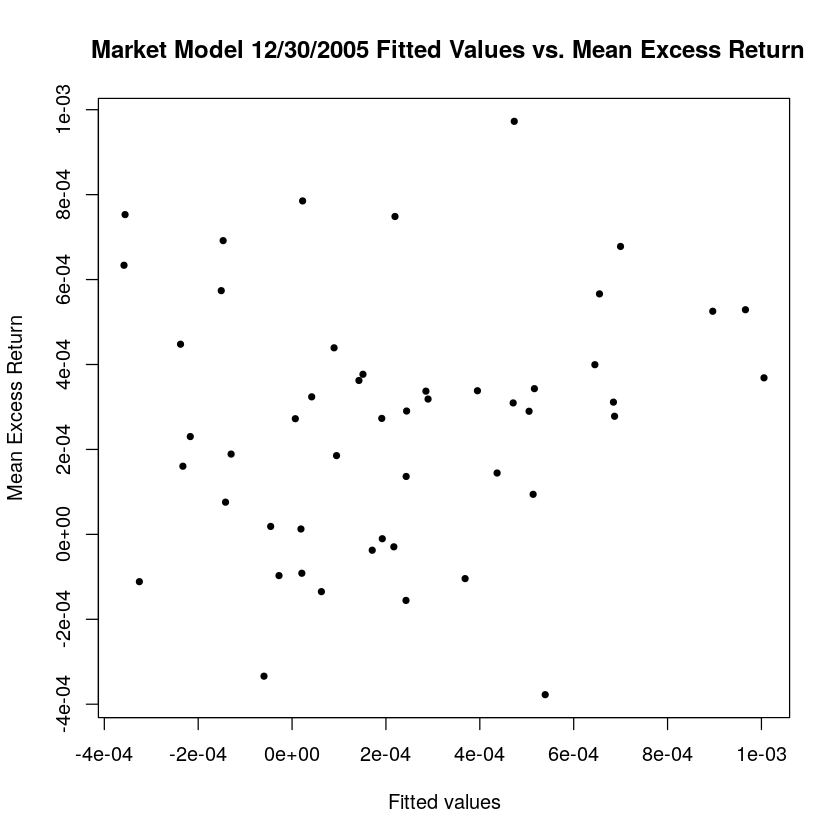

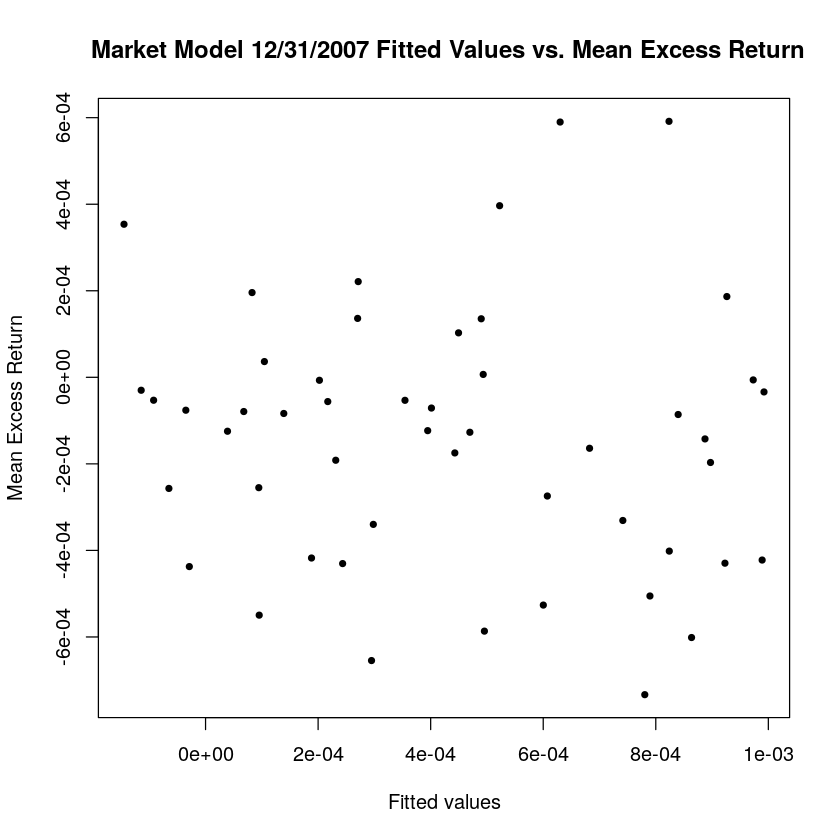

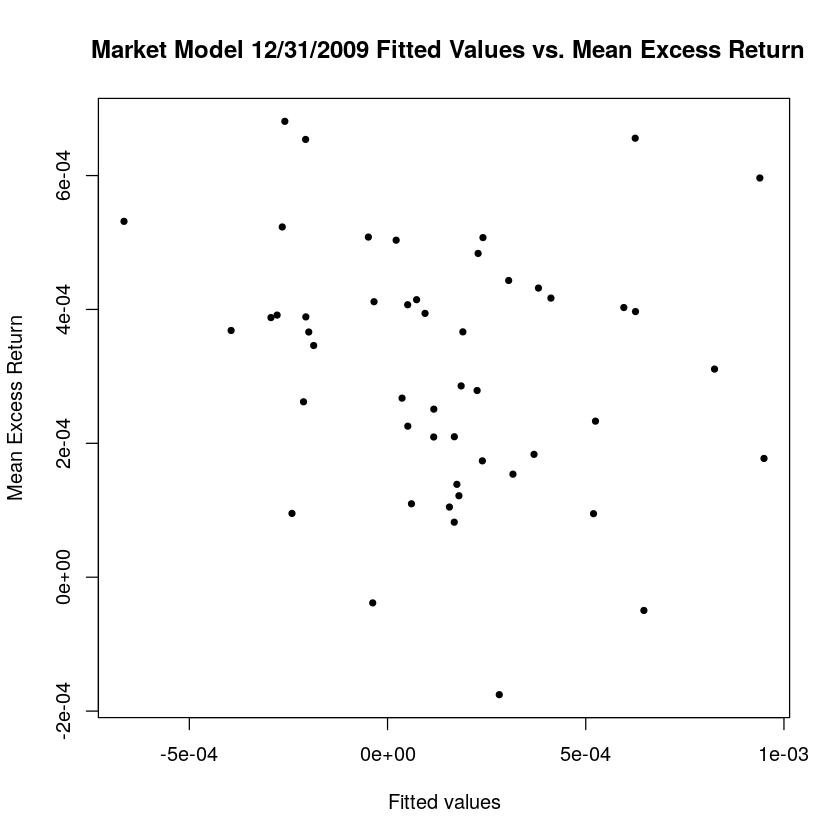

In [607]:

beta_storage <- matrix(rep(0), nrow = 30, ncol = 1448) #For storing betas. Every three rows represents the rolling betas for a given security
for (j in 0:9) {
    ri_minus_rf <- stock_returns[,random_stocks][,(j+1)] - ffdata[,4]
    rm_minus_rf <- ffdata[,1] - ffdata[,4]
    SMB <- ffdata[,2]
    HML <- ffdata[,3]
    beta_M <- c(rep(0,1448))
    beta_SMB <- c(rep(0,1448))
    beta_HML <- c(rep(0,1448))
    for (i in 1:1448) { #iterate through each rolling window 
        ols <- lm(ri_minus_rf[i:(i+62)] ~ rm_minus_rf[i:(i+62)] + SMB[i:(i+62)] + HML[i:(i+62)]) #OLS to find bets at each rolling window 
        beta_M[i] <- ols$coefficients[2] # assign coefficients
        beta_SMB[i] <- ols$coefficients[3]
        beta_HML[i] <-ols$coefficients[4]
    }
    beta_storage [(3*j+1),] <- beta_M # assign coefficients to broader beta_storage
    beta_storage [(3*j+2),] <- beta_SMB
    beta_storage [(3*j+3),] <- beta_HML}
    